In [1]:
from ene300.functions import shubert, griewank, sixhump, easom, eggholder
from ene300.optimization import PSO, FPA, SOS, GWO
from ene300.plot import animate, plot_surface

%matplotlib inline

import numpy as np

def custo(x):

    a = np.array([26.97, 1.865, 39.79])
    b = np.array([-0.3975, -0.03988, -0.3116])
    c = np.array([0.002176, 0.001138, 0.001457])
    
    PG = x
    F = 0
    for i in range(3):
        F += a[i] + b[i]*PG[i]+c[i]*PG[i]**2
    return F

def custo_regularizado(x, alpha=10):
    return custo(x) + alpha*(np.sum(x, axis=0)-550)**2

functions_params = {
    'shubert' :            dict( objective_function = shubert,
                                position_boundary = [[-10, 10],   [-10, 10]  ] ),
    'griewank' :           dict( objective_function = griewank,
                                position_boundary = [[-60, 60],   [-60, 60]  ] ),
    'sixhump' :            dict( objective_function = sixhump,
                                position_boundary = [[-3, 3],     [-2, 2]    ] ),
    'easom' :              dict( objective_function = easom,
                                position_boundary = [[-100, 100], [-100, 100]] ),
    'eggholder' :          dict( objective_function = eggholder,
                                position_boundary = [[-512, 512], [-512, 512]] ),
    'custo_regularizado' : dict( objective_function = custo_regularizado,
                                position_boundary = [[100, 196],  [50, 114]  , [200, 332]] ),
    }

In [33]:
gwo = GWO()
global_best, best_fit, history = gwo(   **functions_params['shubert'],
                                        population = 80, 
                                        itmax = 1000,
                                        max_fa = 1000,
                                        a_function = dict(function='linear_decrease', max=2, min=0))
best_fit

array(-186.68055296)

In [34]:
history['function_evaluations']

1000

In [35]:
history['iteration'][-1]

999

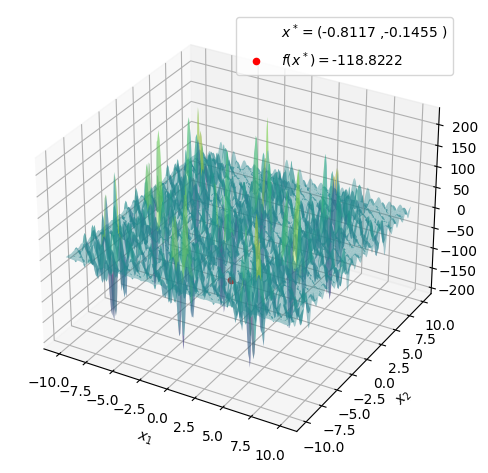

In [5]:
plot_surface(history, cmap='viridis', alpha=0.4)

In [6]:
#animate(history)

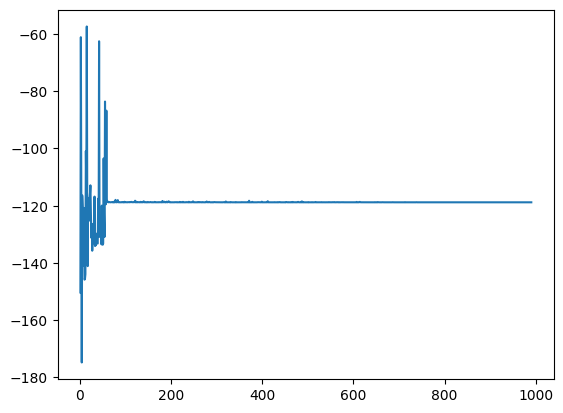

In [7]:
import matplotlib.pyplot as plt
plt.plot(history['iteration'],history['best_fit'])